In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/train/data_merged.csv', sep=';')
df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,...,Good,Poor,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,...,Acceptable,Good,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,...,Good,Acceptable,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,...,Excellent,Good,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

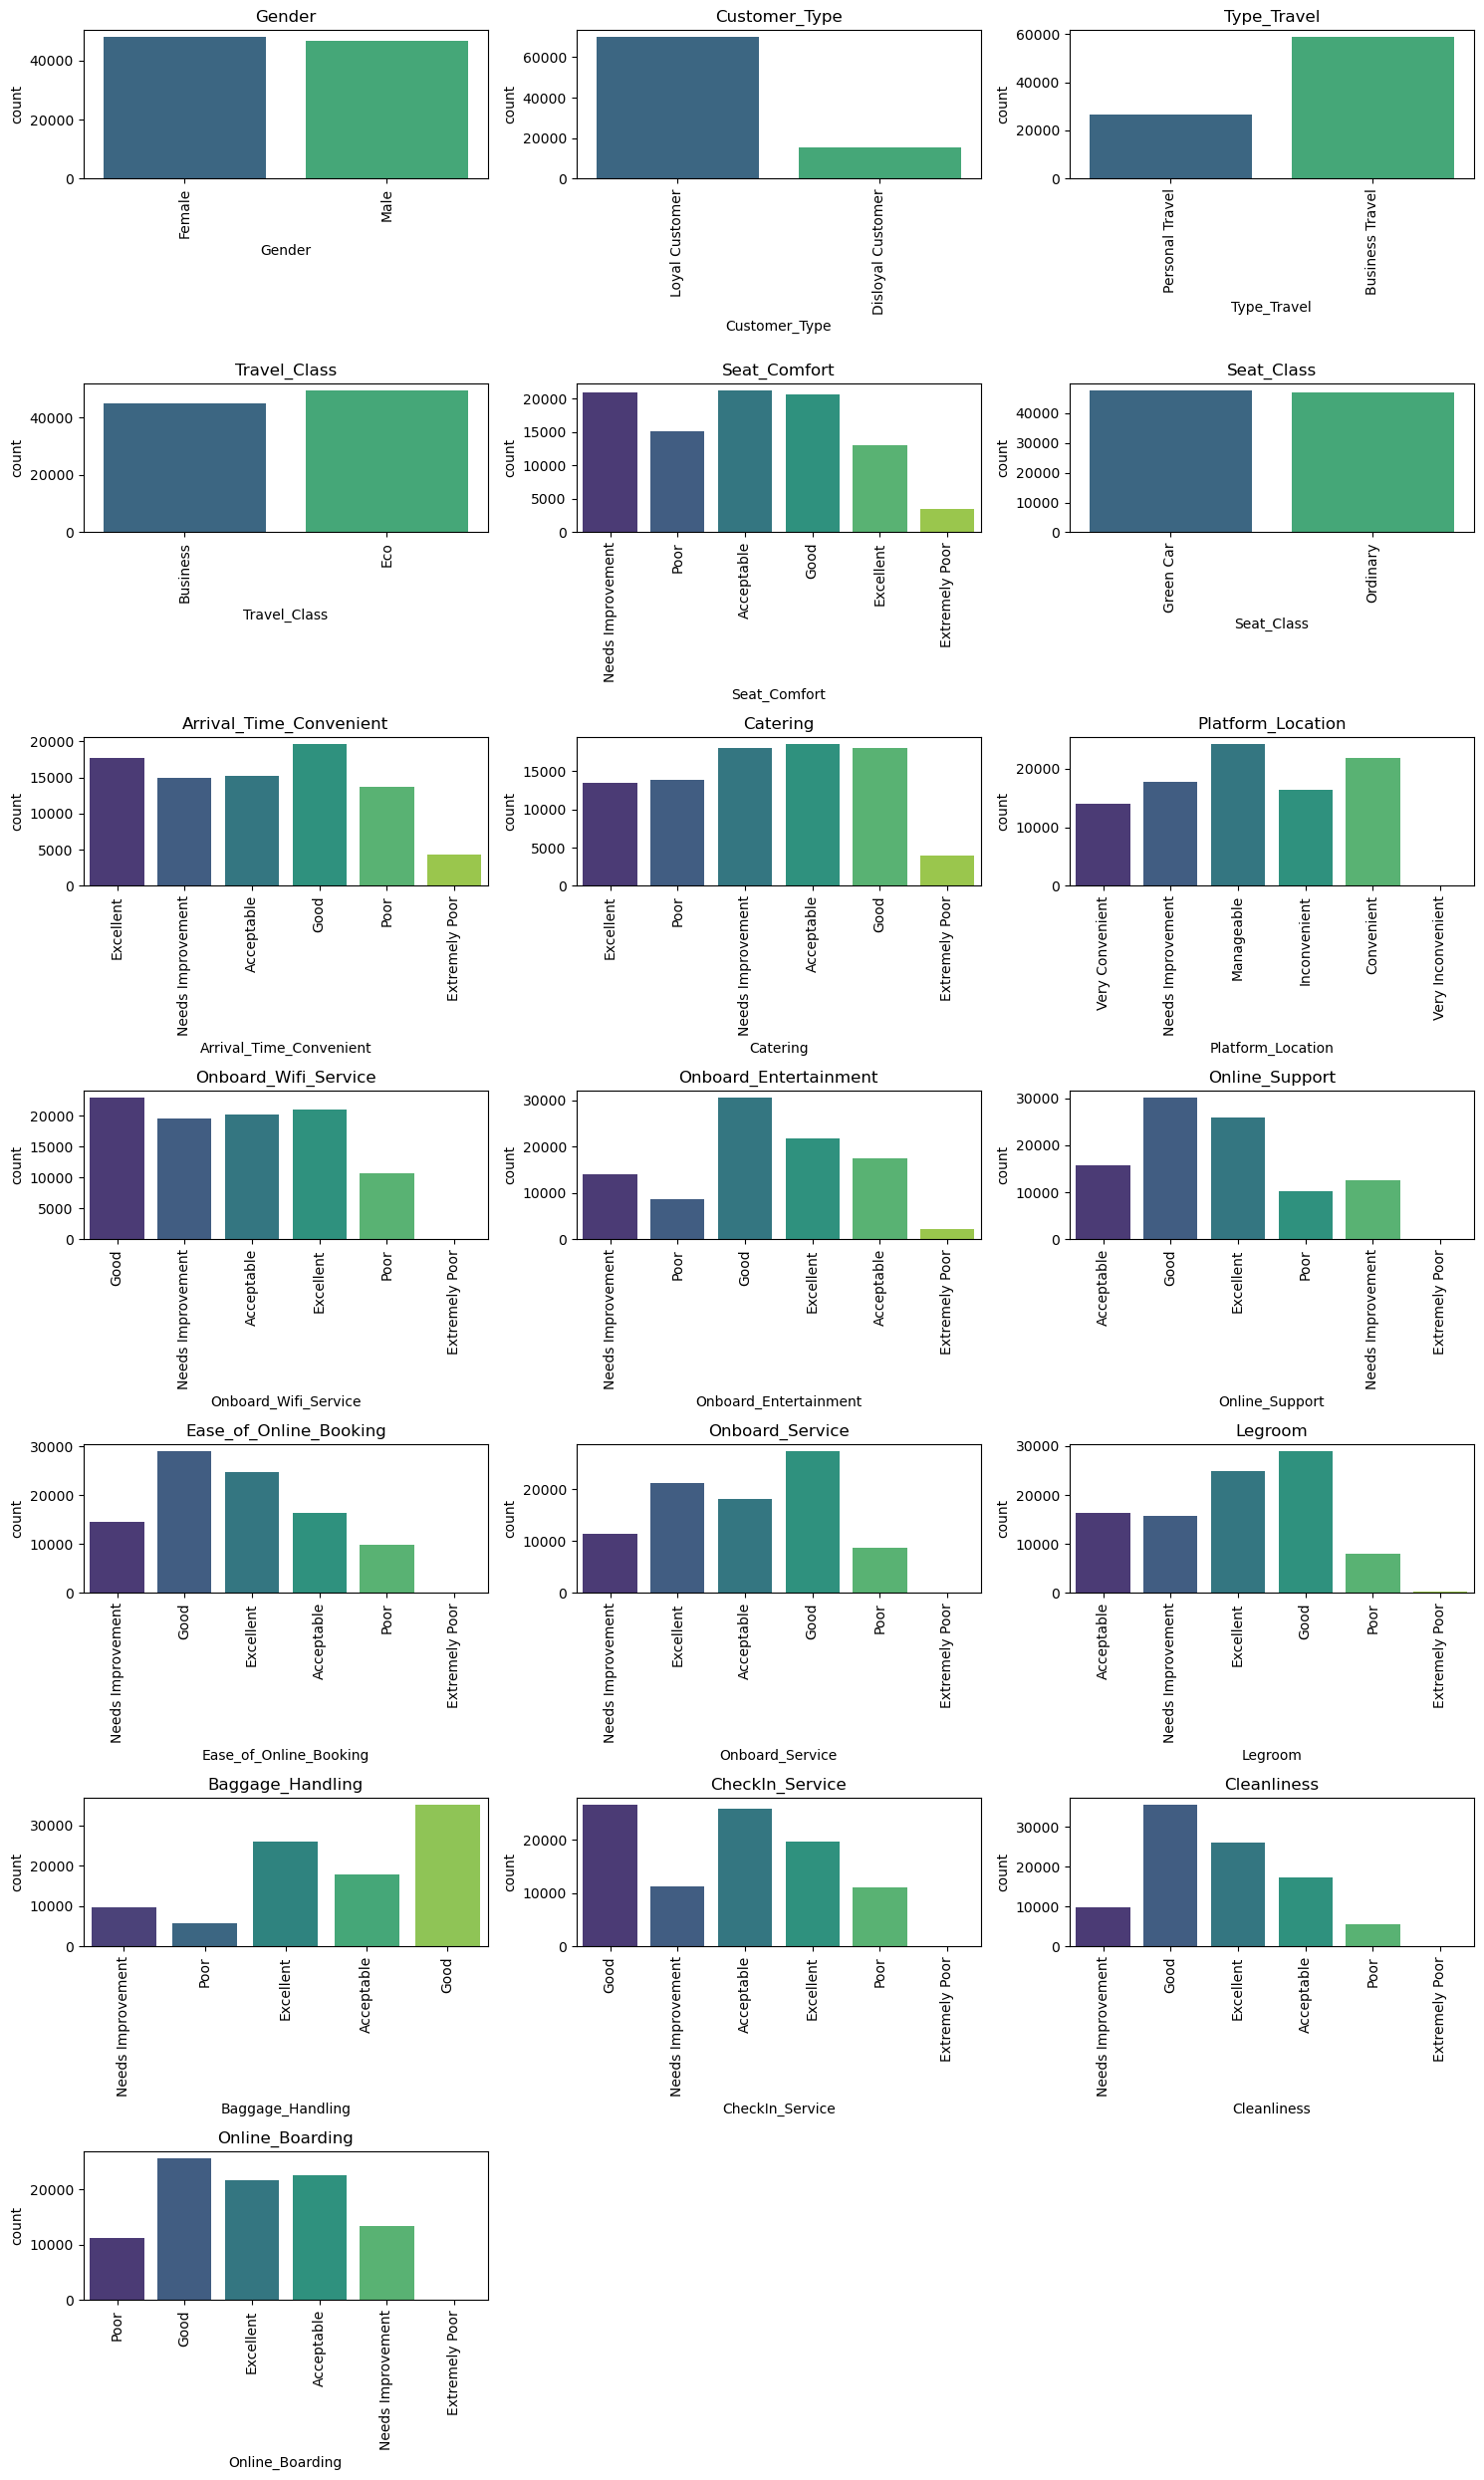

In [4]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 25))

# List of categorical columns to plot
categorical_columns = [
    'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort',
    'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
    'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
    'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling',
    'CheckIn_Service', 'Cleanliness', 'Online_Boarding'
]

# Plot the count distribution of each categorical variable
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(7, 3, i)
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(column)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [5]:
# Create a copy of the merged data for correlation analysis
correlation_data = df.copy()

# List of columns to encode
columns_to_encode = categorical_columns

# Initialize LabelEncoder
le = LabelEncoder()

In [6]:
# Encode categorical variables
for column in columns_to_encode:
    correlation_data[column] = le.fit_transform(correlation_data[column])

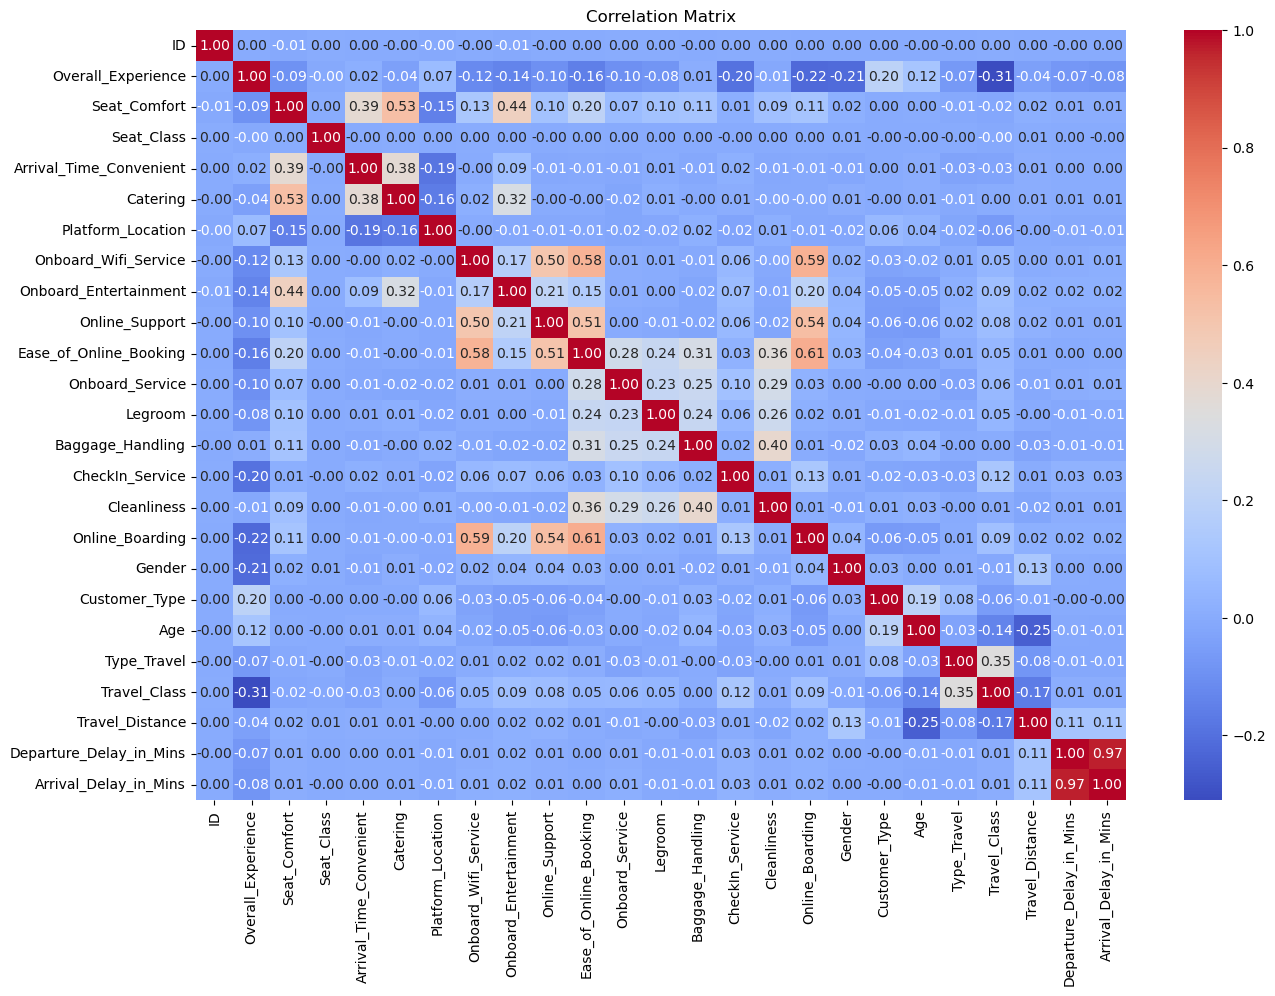

In [7]:
# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()